In [478]:
''' To Do
1. Add more data from IMDB database.(Gross, language, )


Fetching more data from OMDB API
apikey=2be1b857<br>
Example Request :  http://www.omdbapi.com/?i=tt3896198&apikey=2be1b857
Returns JSON

Action Plan:
1. Load your ratings csv and get all IMDB ids
2. using urllib.request urlopen to fetch/get data from OMDB API
3. Using JSON module to actually parse this data.
4. Add/Merge/Join/Concatenate back to original Dataframe.
'''

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import json
from urllib.request import urlopen

API_Key_OMDB = '2be1b857'
# Lets first read the existing csv to grab the film ids

data_exist = pd.read_csv('Data/imdb_ratings_april_2020.csv', engine='python', index_col=0)

# filtering just films using .loc indexer
film_filter = (data_exist['Title Type'] == 'movie')

# Film data
data_film = data_exist.loc[film_filter]

# Lets get the IMDB film IDs in a list

index_interest = data_film.index.to_list()



In [33]:

# Creating url request for the API with movie IDs in the form http://www.omdbapi.com/?i=<IMDB ID>&apikey=2be1b857
# Using urlopen.read to fetch the JSON

# Write a function that just gets the dictionary keys from JSON and creates a DF
def create_df(API_Key_OMDB):
    '''
    Takes in OMDB key and creates empty dataframe with the required columns taken from json keys
    :param index_interest:
    :return:
    '''
    with urlopen('http://www.omdbapi.com/?i=tt3896198&apikey=' + API_Key_OMDB) as response:
        # fetching the JSON string for item
        source = response.read()
        # loading json string as a python dictionary
        data = json.loads(source)
        new_df = pd.DataFrame.from_dict(data, orient = 'columns')
        new_df.drop([0,1,2], axis = 0 , inplace = True)
        return new_df


empty_df = create_df(API_Key_OMDB)

In [43]:

# Function that adds to this dataframe details of all movies in index_interest

def fetch_data(df, list_IDS, API_Key_OMDB):
    ''' For some reason a few of the JSONs for a few of the movie Idsare creating more than one row.
    Later drop all rows with index greater than 1.
    '''
    for i, item in enumerate(list_IDS):
        with urlopen('http://www.omdbapi.com/?i=' + item + '&apikey=' + API_Key_OMDB) as response:
            # fetching the JSON string for item
            source = response.read()
            # loading json string as a python dictionary
            data = json.loads(source)
            add_df = pd.DataFrame.from_dict(data)
            print(len(add_df))
            #add_df.drop([1,2], axis = 0 , inplace = True)
            df = pd.concat([df,add_df])
    return df


complete_df = fetch_data(empty_df, index_interest, API_Key_OMDB)

3
3
3
2
3
2
3
3
3
3
2
3
3
1
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
1
3
3
1
3
3
1
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
1
1
3
3
1
3
3
3
3
3
3
3
3
1
3
2
3
3
1
3
3
1
2
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
1
3
3
1
3
3
3
3
1
2
3
3
3
3
3
3
3
1
3
3
3
3
2
3
3
3
3
3
3
3
3
1
3
3
3
3
2
3
3
3
3
3
2
3
2
3
2
3
3
3
3
3
2
3
3
3
3
3
3
2
3
3
3
3
3
3
1
2
3
3
3
3
3
3
3
2
3
3
3
3
2
3
3
2
3
3
1
3
3
2
3
2
3
2
3
3
3
1
3
3
3
1
3
3
2
1
3
3
3
3
2
2
2
2
3
3
3
3
3
3
3
2
3
2
3
3
2
3
2
3
2
1
3
3
3
2
3
3
3
2
3
3
3
3
2
3
2
3
2
3
2
2
2
2
2
3
1
3
3
1
3
3
2
3
2
2
2
3
2
3
1
3
2
3
3
3
2
1
2
2
3
3
3
2
3
3
3
3
2
2
3
3
3
2
3
3
2
2
3
3
3
3
2
3
3
3
2
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
1
3
1
3
3
3
3
3
2
3
3


### Removing Duplicates 

In [127]:
# Removing Duplicates 
distinct_df = complete_df.loc[complete_df.index < 1]

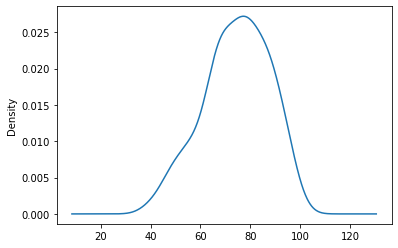

In [601]:
complete_df.loc[complete_df.index < 1].Metascore.replace('N/A', np.nan).astype(float).plot(kind = 'kde')

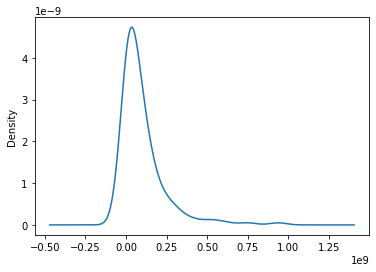

In [605]:
complete_df.loc[complete_df.index < 1].BoxOffice.replace('N/A', np.nan).str.replace('$','').str.replace(',','').astype(float).plot(kind = 'kde')

In [128]:
distinct_df.set_index('imdbID', drop=True, inplace=True)

In [70]:
### Save this DF returned by API

distinct_df.to_csv('Data/Film_data_from_OMDB_API.csv')

#### All columns are Objects

In [129]:
distinct_df.head(2)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,Type,DVD,BoxOffice,Production,Website,Response
imdbID,,,,,,,,,,,,,,,,,,,,,,,,
tt1010048,Slumdog Millionaire,2008,R,25 Dec 2008,120 min,"Drama, Romance","Danny Boyle, Loveleen Tandan(co-director)","Simon Beaufoy (screenplay), Vikas Swarup (novel)","Dev Patel, Saurabh Shukla, Anil Kapoor, Raj Zu...",A Mumbai teenager reflects on his life after b...,"English, Hindi, French, German",UK,Won 8 Oscars. Another 147 wins & 131 nominations.,https://m.media-amazon.com/images/M/MV5BZmNjZW...,"{'Source': 'Internet Movie Database', 'Value':...",85,8.0,"770,590",movie,31 Mar 2009,"$141,243,551",Fox Searchlight Pictures,N/A,True
tt1022603,500 Days of Summer,2009,PG-13,07 Aug 2009,95 min,"Comedy, Drama, Romance",Marc Webb,"Scott Neustadter, Michael H. Weber","Joseph Gordon-Levitt, Zooey Deschanel, Geoffre...",An offbeat romantic comedy about a woman who d...,"English, French, Swedish",USA,Nominated for 2 Golden Globes. Another 17 wins...,https://m.media-amazon.com/images/M/MV5BMTk5Mj...,"{'Source': 'Internet Movie Database', 'Value':...",76,7.7,"456,349",movie,22 Dec 2009,"$32,118,648",Fox Searchlight Pictures,N/A,True


### Selecting which columns to and which to drop

1. Title, - keep for now.
2. Year of release already in data. - Drop
2. Rated could be Important - Keep (10 Features)
3. Released,Runtime, Genre- Drop
4. *Director, Writer (328 distinct), Actors (344 distinct) - Could be interesting, drop for now.
5. PLot - Sentiment Analysis on this ? later, drop for now
6. Language - Keep 
7. COuntry - keep
8. Awards - COuld get complicated in text.(keep)
9. Poster, Ratings, imdbRating, imdbVotes, type, dvd - drop
10. metascore,Boxoffice - keep
11. Production - could be interesting (108 Features) - keep
12. Website, response - Drop

In [131]:
distinct_df.drop(['Year', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot','Poster', 'Ratings', 'imdbRating', 'imdbVotes', 'Type', 'DVD', 'Website', 'Response' ], axis = 1 , inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [154]:
distinct_df.head(2)

,Title,Rated,Language,Country,Awards,Metascore,BoxOffice,Production
imdbID,,,,,,,,
tt1010048,Slumdog Millionaire,R,"English, Hindi, French, German",UK,Won 8 Oscars. Another 147 wins & 131 nominations.,85,"$141,243,551",Fox Searchlight Pictures
tt1022603,500 Days of Summer,T,"English, French, Swedish",USA,Nominated for 2 Golden Globes. Another 17 wins...,76,"$32,118,648",Fox Searchlight Pictures


### Data Wrangling/ Pre-processing/ Cleaning 
Process of converting or mapping data from original raw form into another format, preparing it for further analysis.
1. Identifying and Handling missing values.
2. Data Formating.
3. Data Normalization(centering and scaling).
4. Data bining.
5. Turning categorical values into numerical values.

### Rated Column
lets have everything in 4 columns:
1. Younguns (G) - G
2. teens(T) - PG, pg 13
3. Mature(M) - M, Tv-MA
4. Unrated/Missing(NA) - Most Not Rated movies are Indian Movies. Keep NA(better would be to get Indian Ratings and replace with corresponding)

In [133]:
len(distinct_df['Rated'].unique())

10

In [150]:
distinct_df['Rated'].value_counts()

R            126
T            121
Not Rated     81
G             17
Name: Rated, dtype: int64

### Languages :
1. More than One language = Multilingual/Foreign
2. Single language keep as is
3. Problem is many foreign films with a bit of english etc. also get grouped here.

In [149]:
#distinct_df['Rated'].replace('TV-MA', 'R', inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [284]:
distinct_df.loc[(~distinct_df['Language'].isin(['English','Hindi'])), ['Language']]  = 'Multilingual/Foreign'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Country Column
1. Lets split the countries and expand column. (first column has 16 features, keep these)
2. Keep only two cols, remove rest,
3. Add these two cols back up to see how many combinations we're left with.(50, too many)

In [364]:
distinct_df[['Country', 'Country1']] = distinct_df['Country'].str.split(',', expand = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [366]:
distinct_df.drop(['Country1'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Awards
1. If the word oscar occurs in the filed, set Bafta, emmy, oscar nominee/winner = 1, else = 0
2. Could also parse/ create bins according to how many awards nom/win, too much work, requires re.

In [399]:
distinct_df.loc[(distinct_df['Awards'].str.contains('Oscars')), 'Major_Awards' ] = 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [429]:
distinct_df.loc[(distinct_df['Awards'].str.contains('Oscar')), 'Major_Awards' ] = 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [400]:
distinct_df.loc[(distinct_df['Awards'].str.contains('Golden Globe')), 'Major_Awards'] = 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [408]:
distinct_df.loc[(distinct_df['Awards'].str.contains('Emmy')), 'Major_Awards'] = 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [414]:
distinct_df.loc[(distinct_df['Awards'].str.contains('BAFTA')), 'Major_Awards'] = 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [433]:
distinct_df.loc[(distinct_df['Major_Awards'].isna()), 'Major_Awards'] = 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [451]:
#distinct_df.loc[distinct_df['Major_Awards'] == 0, ['Title','Metascore']].sort_values(by = 'Metascore', ascending = False).head(100)

#### Metascore (Binning)
1. Important Metric of critic praise.
2. Multiple missing values, what do ?
3. Lets bin the scores, >75 - high, >50 - mid > 25 Low, unknown - N/A

In [456]:
distinct_df['Metascore'].isin(['N/A']).value_counts()

False    262
True      83
Name: Metascore, dtype: int64

In [481]:
distinct_df.Metascore.replace('N/A', '0', inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [482]:
distinct_df.Metascore = distinct_df.Metascore.astype(int)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [555]:
# Creating equally spaced bins

#bins = np.linspace(min(distinct_df.Metascore), max(distinct_df.Metascore), 4)

In [492]:
bins = np.insert(bins,1, 1)

In [488]:
# create list of categorical values for bin names 

group_name = ['N/A','low', 'mid', 'high']

In [494]:
distinct_df['Metascore_binned'] = pd.cut(distinct_df['Metascore'], bins, labels = group_name, include_lowest=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [497]:
distinct_df.drop(['Awards', 'Metascore'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Box Office (Just US Box OFfice, Keeping for Now)
0. Almost half the data is missing.
1. Strings, split on $.
2. convert to number.
3. Bin as, Billion $500Million, 100 Million, 10 Million, 1 Million, NA

In [502]:
distinct_df['BoxOffice'].isin(['N/A']).value_counts()

True     191
False    154
Name: BoxOffice, dtype: int64

In [510]:
distinct_df['BoxOffice'] = distinct_df['BoxOffice'].str.replace('$', '')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [513]:
distinct_df['BoxOffice'] = distinct_df['BoxOffice'].str.replace(',', '')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [526]:
distinct_df['BoxOffice'].replace('N/A',  0, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [530]:
distinct_df['BoxOffice'] = distinct_df['BoxOffice'].astype(float)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [532]:
distinct_df['BoxOffice'].sort_values()

imdbID
tt0032553            0.0
tt4154796            0.0
tt0420293            0.0
tt4354792            0.0
tt0437086            0.0
                ...     
tt0369610    528757749.0
tt0468569    533316061.0
tt2527336    619117636.0
tt0499549    749700000.0
tt2488496    936658640.0
Name: BoxOffice, Length: 345, dtype: float64

In [562]:
# Creating equally spaced bins

bins = np.array([0.0, 1.0, 1000000.0, 10000000.0, 100000000.0, 500000000.0])

In [561]:
group_name = ['N/A','1Mil', '10Mil', '100Mil','500Mil']

In [563]:
distinct_df['Box_office_binned'] = pd.cut(distinct_df['BoxOffice'], bins, labels = group_name, include_lowest=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [564]:
distinct_df['Box_office_binned'].value_counts()

N/A       191
100Mil     73
500Mil     45
10Mil      21
1Mil       10
Name: Box_office_binned, dtype: int64

In [570]:
distinct_df.drop(['BoxOffice'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Production House
80 missing values and 107 studios, too many, drop for now.

In [574]:
distinct_df['Production'].value_counts()

N/A                        80
Warner Bros. Pictures      21
20th Century Fox           19
Universal Pictures         17
Paramount Pictures         12
                           ..
LionsGate Entertainment     1
Inferno Entertainment       1
Aamir Khan Productions      1
Marvel Studios              1
FilmDistrict                1
Name: Production, Length: 108, dtype: int64

### Saving Final DF

In [578]:
distinct_df.drop(['Title', 'Production'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [580]:
distinct_df.head(2)

,Rated,Language,Country,Major_Awards,Metascore_binned,Box_office_binned
imdbID,,,,,,
tt1010048,R,Multilingual/Foreign,UK,1,high,500Mil
tt1022603,T,Multilingual/Foreign,USA,1,high,100Mil


In [579]:
distinct_df.to_csv('Data/wrangled_Film_data_from_OMDB_API.csv')